## Exploratory Data Analysis of RNA Expression Data
This notebook is intended to compute some summary statistics and charts of the RNA expression data table as passed to the Open Targets team by Expression Atlas. The table we get from them is a matrix of normalised count (**not RPKM**) values where each column is a tissue and each row is a gene.

In [1]:
%matplotlib inline

### Imports

In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

### Load the data file

In [3]:
expression = pd.read_csv('exp_summary_NormCounts_genes.txt', sep='\t',index_col=0)
expression.head()

,adipose tissue,adrenal gland,amygdala,aorta,atrium auricular region,blood,bone marrow,brain,breast,Brodmann (1909) area 24,...,tibial artery,tibial nerve,tonsil,transformed skin fibroblast,transverse colon,urinary bladder,uterus,vagina,vermiform appendix,zone of skin
ID,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,3517,1494.50,517,838.5,604.0,154.0,150.0,513.5,2311.00,375,...,994.5,1293,758,3152.5,2226,2073.75,1869.5,1335,375.0,524.0
ENSG00000000005,946,5.75,5,4.0,7.0,1.0,0.0,3.0,1802.00,7,...,24.0,73,7,1.0,23,4.75,7.0,4,28.0,9.5
ENSG00000000419,1413,1942.25,920,1357.5,1489.0,648.5,1764.0,1547.5,1530.75,1022,...,1266.5,1134,1858,1637.0,1173,1480.00,1199.0,1277,1561.0,1235.0
ENSG00000000457,719,889.00,467,595.0,519.0,765.0,342.0,706.0,1063.00,472,...,641.0,846,1257,554.5,895,1245.50,820.5,902,1109.5,1322.0
ENSG00000000460,267,184.00,121,176.5,162.0,241.5,736.0,489.5,223.25,91,...,209.0,318,853,208.0,208,311.25,282.5,266,483.0,361.5


### Heatmap
Below is a heatmap of the RNA data after the following logarithmic transform:
```
x => log(x + 1)
```

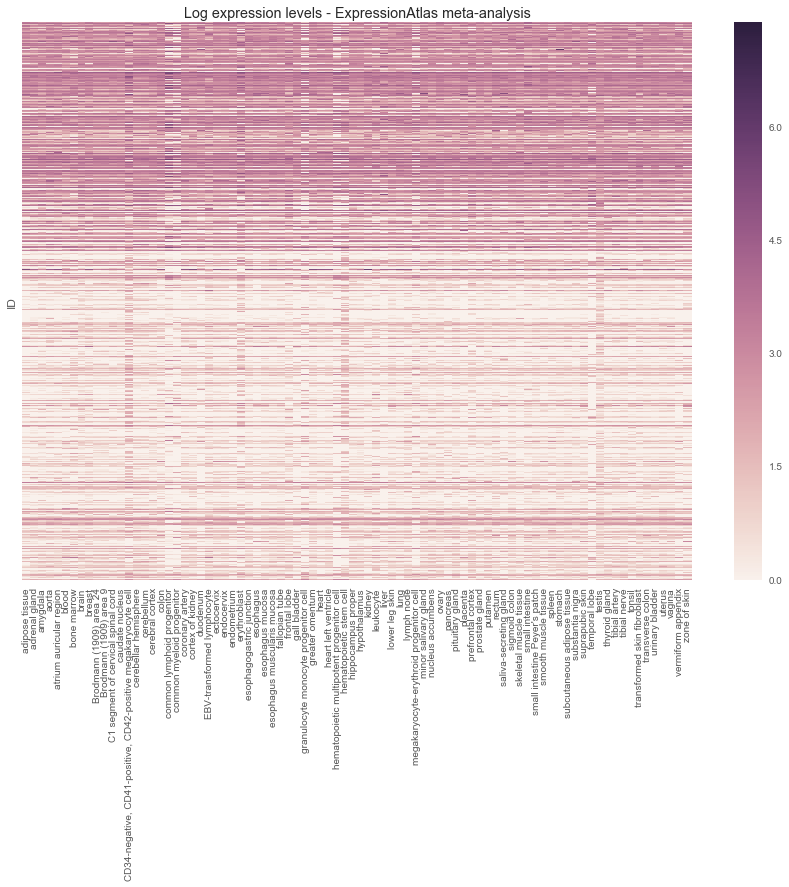

In [4]:
log_expression = np.log10(expression + 1)
plt.figure(figsize=(15, 10))
sns.heatmap(log_expression, yticklabels=False)
plt.title('Log expression levels - ExpressionAtlas meta-analysis')
plt.show()

It seems a bit weird that lower ENSGIDs correspond to higher median expression. One way to find out if this is a batch effect or some sort of weird historical effect of lower ENSGID being discovered first for the most expressed genes, we can use GTEX and see if we observe the same effect.

In [5]:
gtex = pd.read_table('GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_median_tpm.gct',skiprows=2,index_col=0)
gtex = gtex.drop('Description', 1)
gtex.sort_index(inplace=True)
gtex.head()

,Adipose - Subcutaneous,Adipose - Visceral (Omentum),Adrenal Gland,Artery - Aorta,Artery - Coronary,Artery - Tibial,Bladder,Brain - Amygdala,Brain - Anterior cingulate cortex (BA24),Brain - Caudate (basal ganglia),...,Skin - Not Sun Exposed (Suprapubic),Skin - Sun Exposed (Lower leg),Small Intestine - Terminal Ileum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole Blood
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.10,39.7100,34.920,21.565000,13.3100,13.0100,10.6400,36.6100,9.13750,6.9170,8.78150,...,12.130,12.860,22.4200,11.7550,14.77500,97.0900,28.1200,40.1200,38.4100,0.1225
ENSG00000000005.5,26.8050,12.860,0.031855,0.1364,0.5219,0.7048,0.1798,0.10675,0.2035,0.04632,...,1.668,3.507,0.3779,0.1623,0.12375,0.1872,0.2774,0.3187,0.2212,0.0000
ENSG00000000419.8,54.8600,53.270,54.470000,63.9000,58.1700,62.3600,54.3600,17.62500,21.5400,20.73500,...,50.050,49.750,44.2300,58.7400,41.46000,77.1300,61.4850,69.7100,60.0700,13.6300
ENSG00000000457.9,7.0970,5.205,5.317000,5.5120,6.0720,6.2840,11.9700,1.71600,1.9760,1.92100,...,7.356,8.406,6.2490,6.8755,5.30950,7.5220,9.4745,9.0480,8.4180,3.3790
ENSG00000000460.12,2.4585,1.697,1.279000,1.7490,1.9800,2.1120,2.6730,0.56845,0.4307,0.63885,...,1.982,2.051,1.8330,2.5020,1.29100,9.8460,2.5845,3.6800,2.8590,0.6405


In [6]:
gtex.index

Index(['ENSG00000000003.10', 'ENSG00000000005.5', 'ENSG00000000419.8',
       'ENSG00000000457.9', 'ENSG00000000460.12', 'ENSG00000000938.8',
       'ENSG00000000971.11', 'ENSG00000001036.9', 'ENSG00000001084.6',
       'ENSG00000001167.10',
       ...
       'ENSGR0000237040.1', 'ENSGR0000237531.1', 'ENSGR0000237801.1',
       'ENSGR0000263835.1', 'ENSGR0000263980.1', 'ENSGR0000264510.1',
       'ENSGR0000264819.1', 'ENSGR0000265350.1', 'ENSGR0000265658.1',
       'ENSGR0000266731.1'],
      dtype='object', name='gene_id', length=56202)

In [7]:
expression.index

Index(['ENSG00000000003', 'ENSG00000000005', 'ENSG00000000419',
       'ENSG00000000457', 'ENSG00000000460', 'ENSG00000000938',
       'ENSG00000000971', 'ENSG00000001036', 'ENSG00000001084',
       'ENSG00000001167',
       ...
       'ENSG00000281884', 'ENSG00000281892', 'ENSG00000281896',
       'ENSG00000281902', 'ENSG00000281903', 'ENSG00000281904',
       'ENSG00000281909', 'ENSG00000281912', 'ENSG00000281918',
       'ENSG00000281920'],
      dtype='object', name='ID', length=42916)

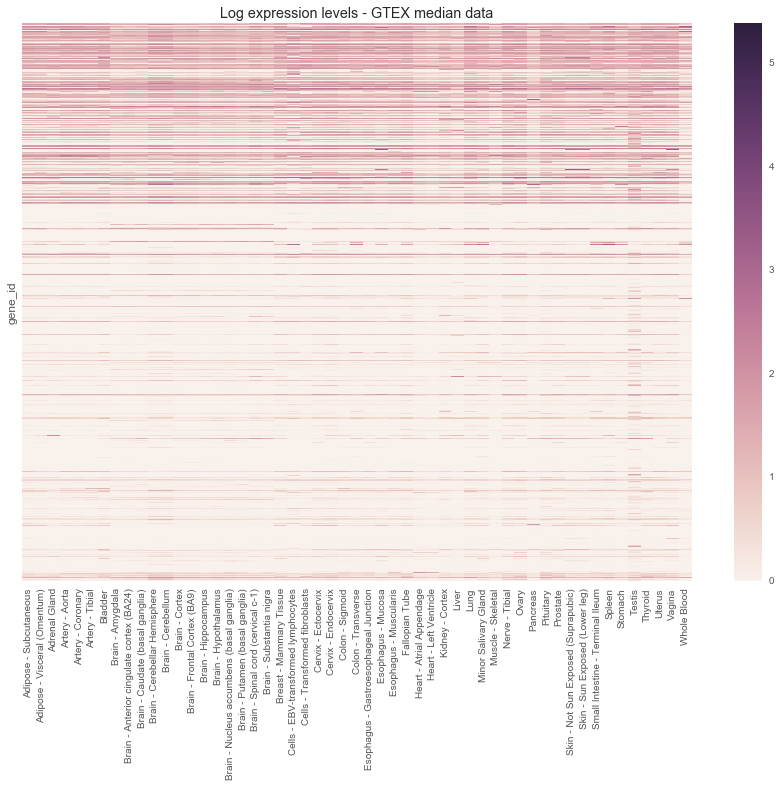

In [8]:
plt.figure(figsize=(15, 10))
sns.heatmap(np.log10(gtex + 1), yticklabels=False)
plt.title('Log expression levels - GTEX median data')
plt.show()

### Apply a threshold
Expression Atlas suggested applying a threshold of between 2 and 8, so 6 was chosen.

In [9]:
threshold = np.log10(6)
threshold_log_expression = log_expression[log_expression > threshold]

In [10]:
threshold_log_expression.head()

,adipose tissue,adrenal gland,amygdala,aorta,atrium auricular region,blood,bone marrow,brain,breast,Brodmann (1909) area 24,...,tibial artery,tibial nerve,tonsil,transformed skin fibroblast,transverse colon,urinary bladder,uterus,vagina,vermiform appendix,zone of skin
ID,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,3.546296,3.174786,2.714330,2.924021,2.781755,2.190332,2.178977,2.711385,3.363988,2.575188,...,2.998041,3.111934,2.880242,3.498793,3.347720,3.316966,3.271958,3.125806,2.575188,2.720159
ENSG00000000005,2.976350,0.829304,NaN,NaN,0.903090,NaN,NaN,NaN,3.255996,0.903090,...,1.397940,1.869232,0.903090,NaN,1.380211,NaN,0.903090,NaN,1.462398,1.021189
ENSG00000000419,3.150449,3.288529,2.964260,3.133060,3.173186,2.812579,3.246745,3.189911,3.185188,3.009876,...,3.102948,3.054996,3.269279,3.214314,3.069668,3.170555,3.079181,3.106531,3.193681,3.092018
ENSG00000000457,2.857332,2.949390,2.670246,2.775246,2.716003,2.884229,2.535294,2.849419,3.026942,2.674861,...,2.807535,2.927883,3.099681,2.744684,2.952308,3.095692,2.914608,2.955688,3.045519,3.121560
ENSG00000000460,2.428135,2.267172,2.086360,2.249198,2.212188,2.384712,2.867467,2.690639,2.350732,1.963788,...,2.322219,2.503791,2.931458,2.320146,2.320146,2.494502,2.452553,2.426511,2.684845,2.559308


### Reshape to one-dimensional array

In [11]:
flat_expression = expression.values.flatten()
flat_log_expression = log_expression.values.flatten()
flat_threshold_log_expression = threshold_log_expression.values.flatten()

# filter nans
flat_threshold_log_expression = flat_threshold_log_expression[~np.isnan(flat_threshold_log_expression)]

### Plot a histogram and calculate levels
Possible 10-level calculation schemes include:
* deciles
* division of the log expression range into ten portions (effectively the histogram buckets below)

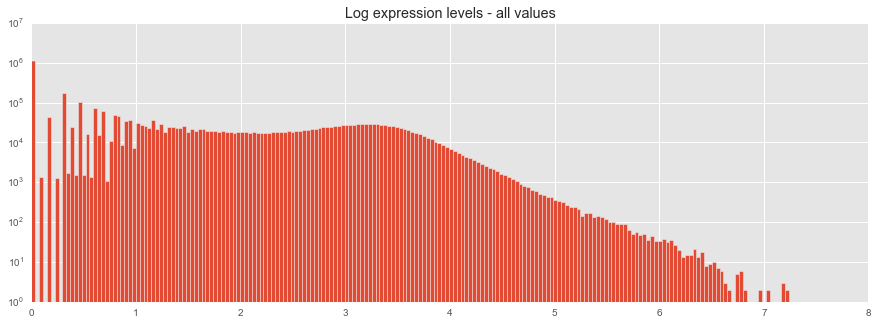

In [12]:
plt.figure(figsize=(15, 5))
plt.hist(flat_log_expression, bins=200)
plt.title('Log expression levels - all values')
plt.yscale('log')
plt.show()

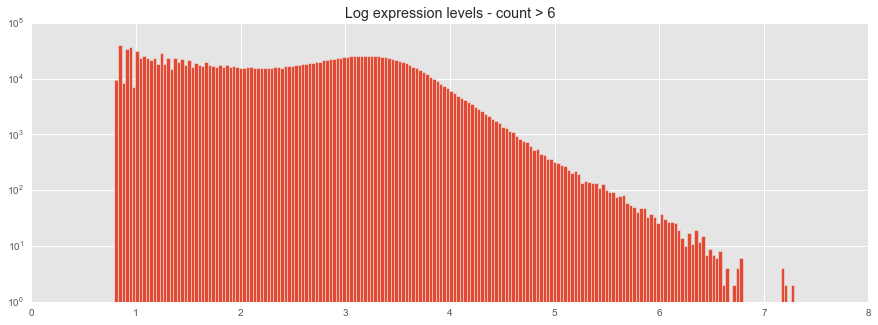

In [13]:
plt.figure(figsize=(15, 5))
plt.hist(flat_threshold_log_expression, bins=200)
plt.title('Log expression levels - count > 6')
plt.yscale('log')
plt.show()

### Check distribution per tissue
The following boxplot shows the distribution of values per tissue.

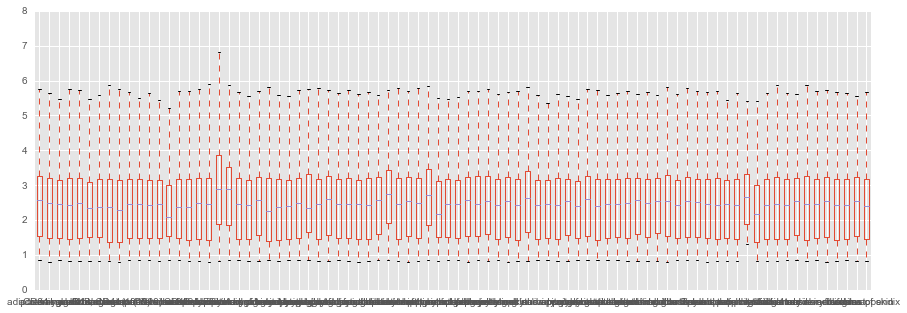

In [14]:
plt.figure()
threshold_log_expression.plot.box(figsize=(15, 5))
plt.show()

### Check distribution per gene
There are too many genes for an equivalent to the above, but histograms of some summary statistics (per gene) should give a sense of the distributions. They are much more variable than the per tissue distributions.

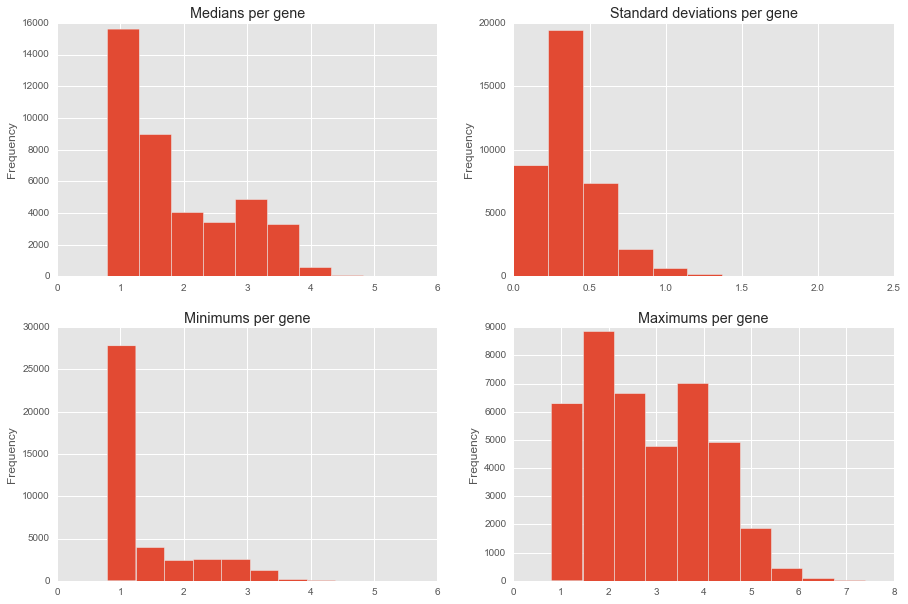

In [15]:
medians = threshold_log_expression.T.median()
stds = threshold_log_expression.T.std()
mins = threshold_log_expression.T.min()
maxs = threshold_log_expression.T.max()

plt.figure(figsize=(15, 10))

plt.subplot(221)
plt.title('Medians per gene')
medians.plot.hist()

plt.subplot(222)
plt.title('Standard deviations per gene')
stds.plot.hist()

plt.subplot(223)
plt.title('Minimums per gene')
mins.plot.hist()

plt.subplot(224)
plt.title('Maximums per gene')
maxs.plot.hist()

plt.show()

### Generate buckets using the threshold log method
Create ten buckets of equal width (in the `log(counts + 1)` axis). Note that this means the buckets will not have equal numbers of entries (ie. unlike deciles).

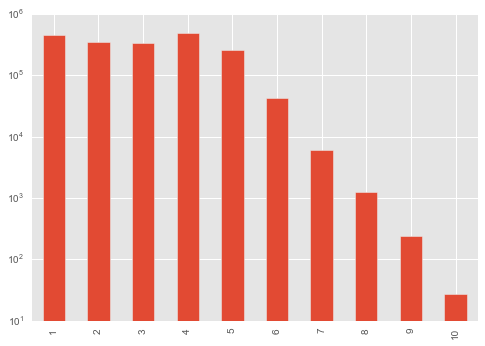

In [16]:
str_labels=['1','2','3','4','5','6','7','8','9','10']
threshold_log_binned = pd.cut(threshold_log_expression.unstack(),bins=10,labels=str_labels)
threshold_log_binned.value_counts(sort=False).plot.bar(logy=True)

In [17]:
# how many data points in each bucket?
threshold_log_binned.value_counts().sort_index()

1     452206
2     343345
3     339683
4     482725
5     259848
6      42178
7       6013
8       1259
9        243
10        27
dtype: int64

#### Save gene x tissue matrix of bin values to file

In [18]:
threshold_log_binned_array = threshold_log_binned.unstack(level=0, fill_value=-1)
threshold_log_binned_array.head()

,adipose tissue,adrenal gland,amygdala,aorta,atrium auricular region,blood,bone marrow,brain,breast,Brodmann (1909) area 24,...,tibial artery,tibial nerve,tonsil,transformed skin fibroblast,transverse colon,urinary bladder,uterus,vagina,vermiform appendix,zone of skin
ID,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,5,4,3,4,4,3,3,3,4,3,...,4,4,4,5,4,4,4,4,3,3
ENSG00000000005,4,1,NaN,NaN,1,NaN,NaN,NaN,4,1,...,1,2,1,NaN,1,NaN,1,NaN,2,1
ENSG00000000419,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
ENSG00000000457,4,4,3,4,3,4,3,4,4,3,...,4,4,4,3,4,4,4,4,4,4
ENSG00000000460,3,3,2,3,3,3,4,3,3,2,...,3,3,4,3,3,3,3,3,3,3


In [19]:
threshold_log_binned_array.to_csv('expatlas.baseline.binned.tsv',sep='\t',na_rep='-1')

### Generate buckets using the deciles method
Create ten buckets using deciles.

[ 0  1  2  3  4  5  6  7  8  9 10]
[1677417  188929  195783  191850  194248  192862  192794  192751  192755
  192787  192768]


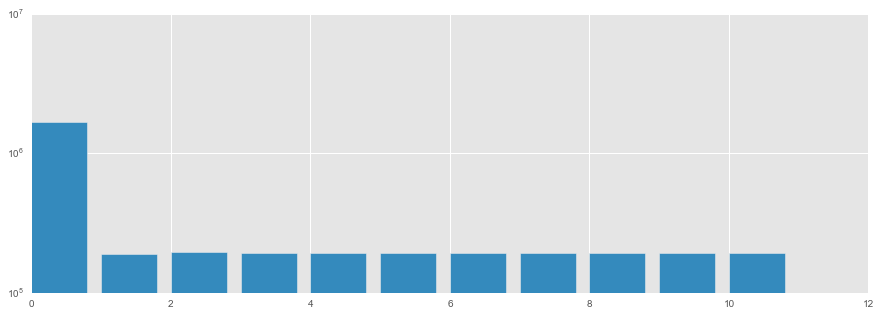

In [20]:
deciles = np.percentile(flat_threshold_log_expression, np.arange(0, 101, 10))
decile_levels = DataFrame(data=np.digitize(np.nan_to_num(threshold_log_expression), deciles[:-1]),
                          index=expression.index,
                          columns=expression.columns)
# How many items per bin?
uniq, counts = np.unique(decile_levels.values.flatten(), return_counts=True)
print(uniq)
print(counts)
plt.figure(figsize=(15, 5))
plt.bar(uniq, counts)
plt.yscale('log')
plt.show()

This is far less useful. **let's use the approach above** (Eliseo + Ian)

### Look at specific gene profiles
This is what is eventually displayed on the RNA baseline expression widget. The following genes have been identified as interesting:
* OPALIN: ENSG00000197430
* MB: ENSG00000198125
* IL5: ENSG00000113525

In [21]:
# opalin_comparison = DataFrame({'deciles': decile_levels.T['ENSG00000197430'],
#                                'threshold_log_levels': threshold_log_levels.T['ENSG00000197430']})
# plt.figure(figsize=(15, 5))
# opalin_comparison.plot.bar(title='OPALIN', figsize=(15, 5))
# plt.show()

NameError: name 'threshold_log_levels' is not defined

In [ ]:
# mb_comparison = DataFrame({'deciles': decile_levels.T['ENSG00000198125'],
#                            'threshold_log_levels': threshold_log_levels.T['ENSG00000198125']})
# plt.figure(figsize=(15, 5))
# mb_comparison.plot.bar(title='MB', figsize=(15, 5))
# plt.show()

In [ ]:
# il5_comparison = DataFrame({'deciles': decile_levels.T['ENSG00000113525'],
#                             'threshold_log_levels': threshold_log_levels.T['ENSG00000113525']})
# plt.figure(figsize=(15, 5))
# il5_comparison.plot.bar(title='IL5', figsize=(15, 5))
# plt.show()

### How linked are pairs of tissues and pairs of genes?

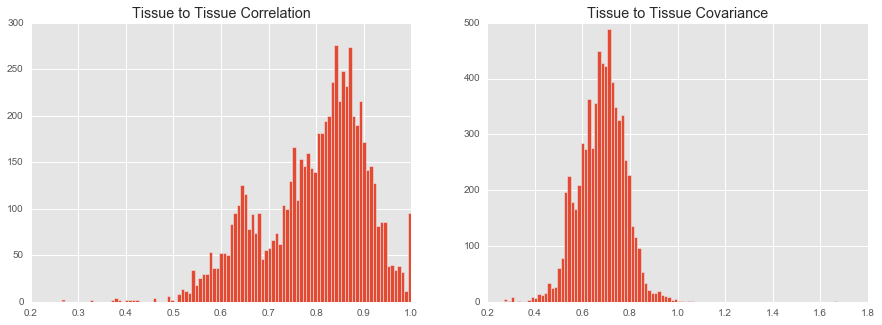

In [22]:
tissue_corr = threshold_log_expression.corr()
tissue_cov = threshold_log_expression.cov()
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.title('Tissue to Tissue Correlation')
plt.hist(tissue_corr.values.flatten(), bins=100)

plt.subplot(122)
plt.title('Tissue to Tissue Covariance')
plt.hist(tissue_cov.values.flatten(), bins=100)

plt.show()

The top correlated tissues are:

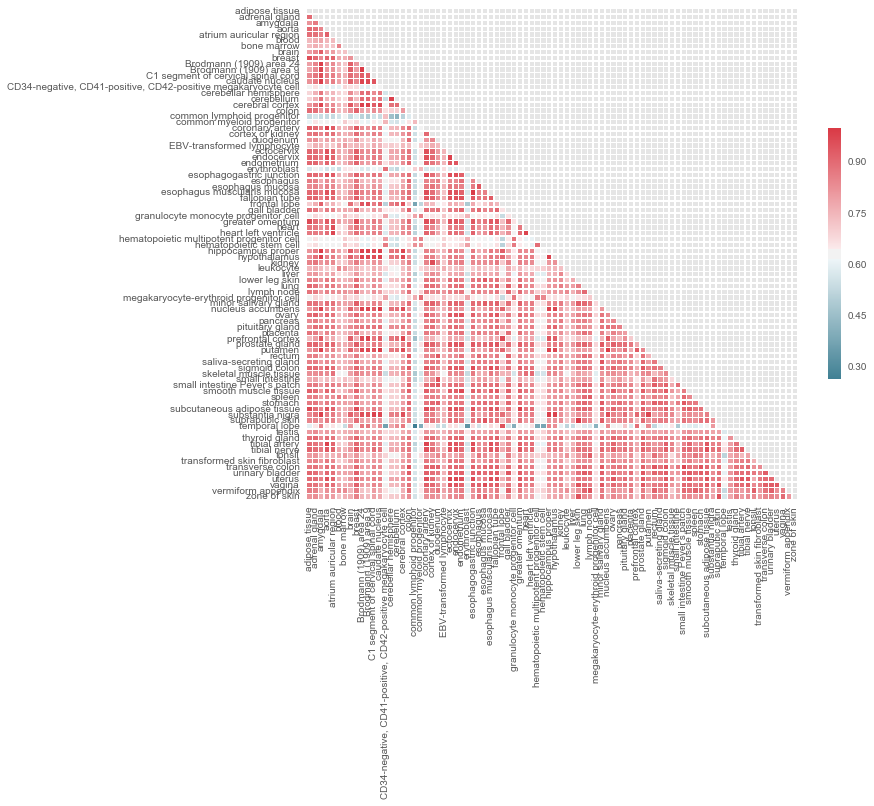

In [23]:
# Generate a mask for the upper triangle
mask = np.zeros_like(tissue_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(tissue_corr, mask=mask, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

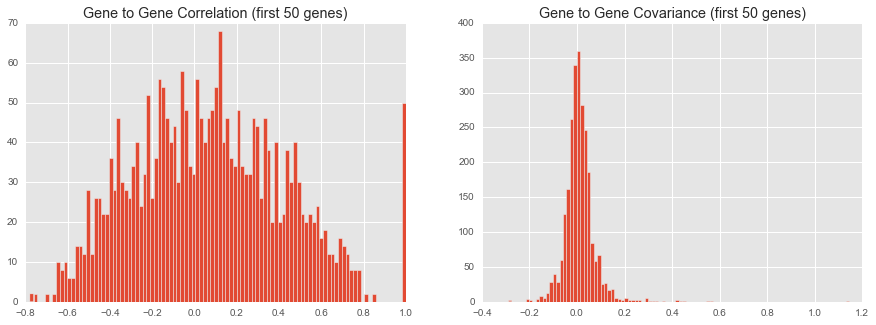

In [24]:
# There are too many gene-gene comparisons to complete in a reasonable time,
# so pick the first 50 genes and just do pairwise comparisons on those.
gene_subset = threshold_log_expression.head(n=50)
gene_corr = gene_subset.T.corr()
gene_cov = gene_subset.T.cov()
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.title('Gene to Gene Correlation (first 50 genes)')
plt.hist(gene_corr.values.flatten(), bins=100)

plt.subplot(122)
plt.title('Gene to Gene Covariance (first 50 genes)')
plt.hist(gene_cov.values.flatten(), bins=100)

plt.show()

Much more randomly distributed, as expected.

## Tissue-Specificity Metrics
There are multiple ways to calculate tissue-specificity per gene and this [paper](https://academic.oup.com/bib/article/18/2/205/2562739/A-benchmark-of-gene-expression-tissue-specificity) offers a comparison. Based on their recommendation, the tau method is calculated below. However, this gives a single value per gene, which is not ideal for faceting (since we don't then know which tissue is responsible for a strong specificity). Some other methods (such as z-score) are therefore also calculated.

In [25]:
# x_hat is an intermediate step and gives a normalised value per gene-tissue cell
# (tau is per gene; ie. an aggregation occurs across tissues)
gene_maxes = log_expression.T.max()
normaliser = DataFrame(data=[gene_maxes.values] * len(log_expression.columns),
                       index=expression.columns,
                       columns=expression.index)
x_hat = log_expression / normaliser.T
tau = x_hat.T.apply(lambda x: 1 - x).sum() / log_expression.shape[1]

### Tissue-specificity by tau
To view the sorted list, call the following:
```
print(tau.sort_values())
```
A couple of the top gene hits by tau value are listed below, and looking at their GTEx profile shows very small absolute values, with one pronounced tissue, which is exactly the case we looked for in IL5.
* ENSG00000187545 = PRAMEF10
* ENSG00000166351 = POTED

Below is a histogram of the tau value across all genes.

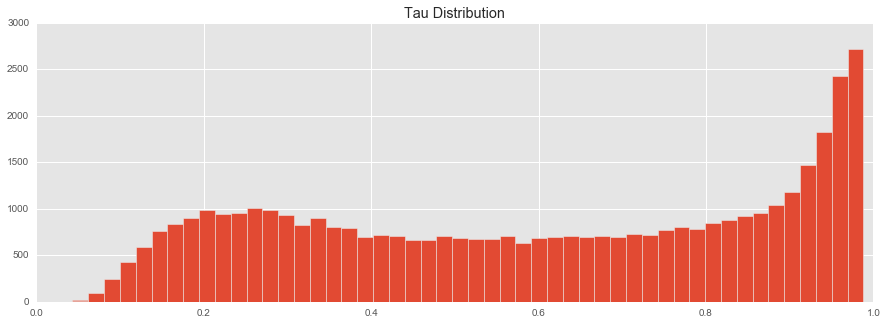

In [26]:
plt.figure(figsize=(15, 5))
plt.title('Tau Distribution')
tau.hist(bins=50)
plt.show()

In [27]:
# Where do IL5, MB and OPALIN fit in?

# IL5
print(tau.T['ENSG00000113525'])
# OPALIN
print(tau.T['ENSG00000197430'])
# MB
print(tau.T['ENSG00000198125'])

0.707306993062
0.754746763061
0.638188256195


In [28]:
tau.to_csv('tau.tsv', sep="\t")

In [29]:
pd.cut(tau,bins=10,labels=range(int(1),11)).astype(int).to_csv('tau.bins.tsv',sep="\t")

**Based on the examples above, z-score (below) fits better our criteria.** (eliseo + ian)

## Tissue-specificity by z-score
The z-score is calculcated as `z = x - mu / sigma` where `mu` is the mean of gene expression, `sigma` is the standard deviation.

In [30]:
zscore = threshold_log_expression.apply(lambda x: (x - x.mean()) /x.std(ddof=0), axis=1)
zscore.head()

,adipose tissue,adrenal gland,amygdala,aorta,atrium auricular region,blood,bone marrow,brain,breast,Brodmann (1909) area 24,...,tibial artery,tibial nerve,tonsil,transformed skin fibroblast,transverse colon,urinary bladder,uterus,vagina,vermiform appendix,zone of skin
ID,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,1.217930,0.518341,-0.348745,0.046124,-0.221775,-1.335485,-1.356867,-0.354289,0.874626,-0.610763,...,0.185512,0.399984,-0.036316,1.128478,0.843993,0.786079,0.701324,0.426107,-0.610763,-0.337767
ENSG00000000005,2.823683,-0.921723,NaN,NaN,-0.793006,NaN,NaN,NaN,3.311510,-0.793006,...,0.070232,0.892375,-0.793006,NaN,0.039306,NaN,-0.793006,NaN,0.182676,-0.586989
ENSG00000000419,-0.105627,0.367203,-0.743204,-0.165176,-0.027769,-1.262610,0.224120,0.029503,0.013329,-0.587000,...,-0.268288,-0.432493,0.301287,0.113066,-0.382250,-0.036779,-0.349674,-0.256019,0.042412,-0.305715
ENSG00000000457,-0.230614,0.132953,-0.969484,-0.554801,-0.788771,-0.124391,-1.502455,-0.261865,0.439231,-0.951256,...,-0.427281,0.048016,0.726503,-0.675501,0.144477,0.710751,-0.004415,0.157825,0.512598,0.812911
ENSG00000000460,-0.003136,-0.469141,-0.992610,-0.521176,-0.628326,-0.128850,1.268779,0.756842,-0.227224,-1.347469,...,-0.309772,0.215896,1.454038,-0.315774,-0.315774,0.189006,0.067558,-0.007836,0.740069,0.376625


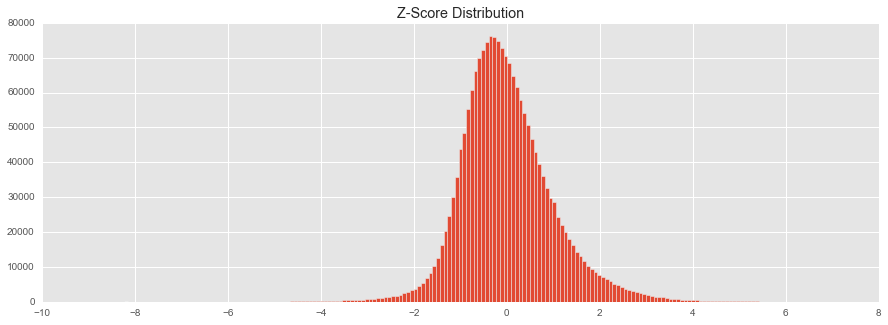

In [31]:
plt.figure(figsize=(15, 5))
plt.title('Z-Score Distribution')
zscore.unstack().hist(bins=200)
# plt.yscale('log')
plt.show()

testis                                                            3.312179
erythroblast                                                      1.365605
leukocyte                                                         0.617464
CD34-negative, CD41-positive, CD42-positive megakaryocyte cell    0.459664
small intestine                                                   0.196415
tibial artery                                                    -0.107484
EBV-transformed lymphocyte                                       -0.107484
uterus                                                           -0.339686
aorta                                                            -0.339686
brain                                                            -0.466920
Name: ENSG00000113525, dtype: float64


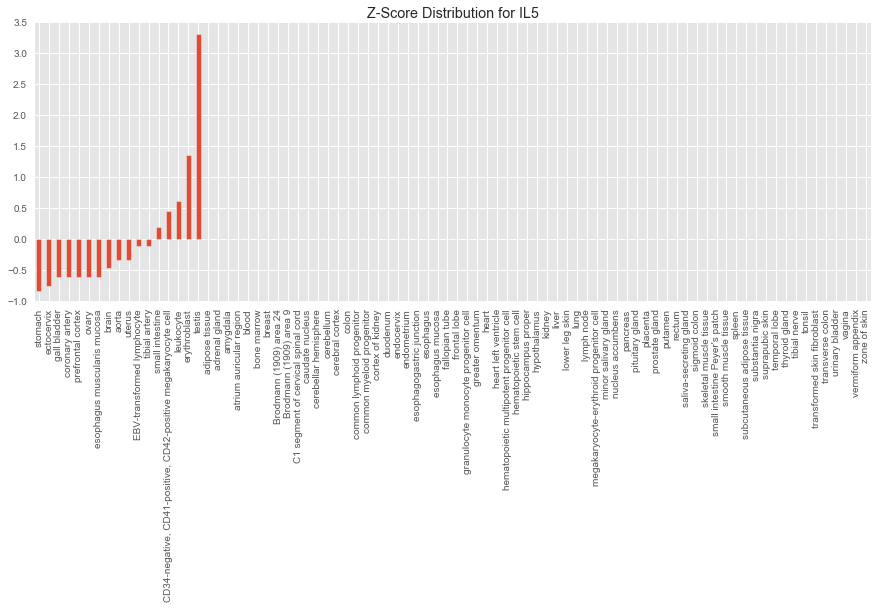

In [32]:
def zscgene(ensgid,genename):
    gene = zscore.loc[ensgid]
    print(gene.sort_values(ascending=False).head(10))

    plt.figure(figsize=(15, 5))
    plt.title('Z-Score Distribution for %s' % genename)
    gene.sort_values().plot.bar()
    plt.show()

zscgene('ENSG00000113525','IL5')

frontal lobe                          1.355118
putamen                               1.024852
brain                                 0.999715
hippocampus proper                    0.955580
amygdala                              0.951508
prefrontal cortex                     0.948545
temporal lobe                         0.938610
C1 segment of cervical spinal cord    0.814904
caudate nucleus                       0.721270
substantia nigra                      0.720433
Name: ENSG00000197430, dtype: float64


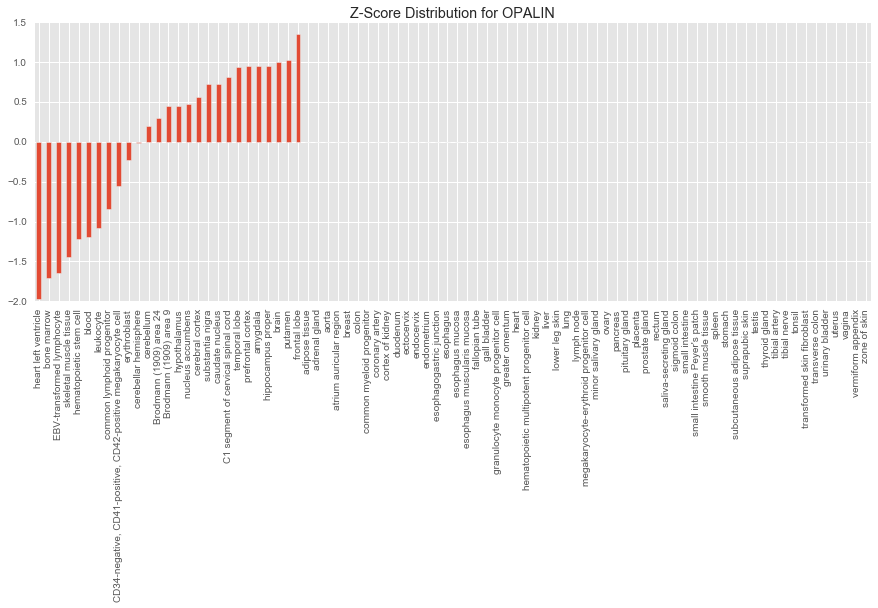

In [33]:
# Is OPALIN specifically expressed in brain?
zscgene('ENSG00000197430','OPALIN')

atrium auricular region    3.508001
heart left ventricle       3.465056
heart                      3.428441
skeletal muscle tissue     2.950469
breast                     1.797754
testis                     1.323900
minor salivary gland       1.003130
saliva-secreting gland     0.963665
pituitary gland            0.524777
prostate gland             0.472204
Name: ENSG00000198125, dtype: float64


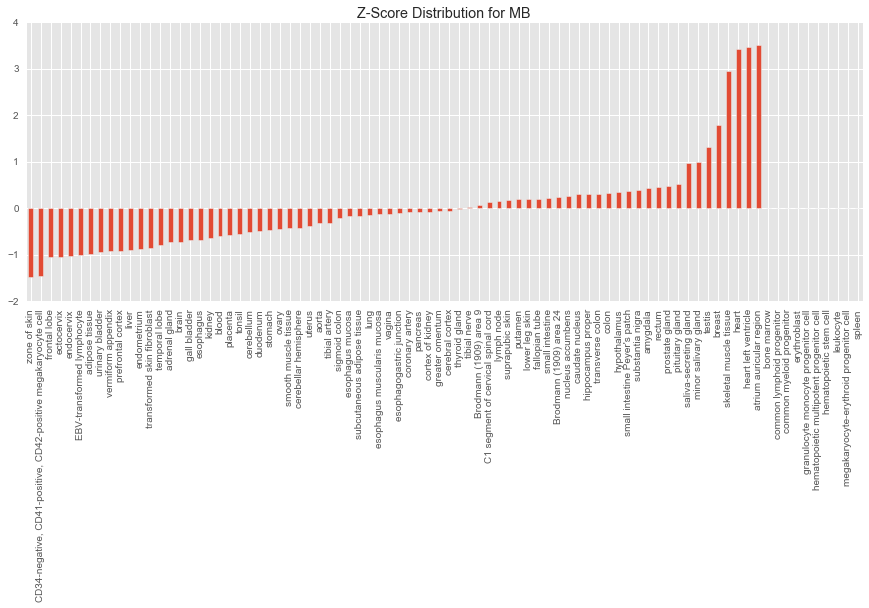

In [34]:
# Is MB specifically expressed in heart and muscle?
zscgene('ENSG00000198125','MB')

## Bin the z-scores
For the sake of the API, it is nice to bin the data for z-score:

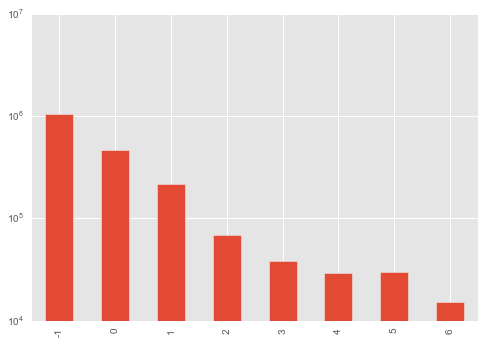

In [35]:
actual_labels=['NA','below top 10%','top25%',"top10%",'top5%','top2.5%','top1%','top0.1%']
num_labels=['-1','0','1','2','3','4','5','6']
zsc_binned = pd.cut(zscore.unstack(),
           bins=[float("-inf"),0,0.674,1.281,1.645,1.96,2.326,3.09,float("inf")],
           labels=num_labels)
zsc_binned.value_counts(sort=False).plot.bar(logy=True)

In [36]:
zsc_binned_array = zsc_binned.unstack(level=0)
zsc_binned_array.head()

,adipose tissue,adrenal gland,amygdala,aorta,atrium auricular region,blood,bone marrow,brain,breast,Brodmann (1909) area 24,...,tibial artery,tibial nerve,tonsil,transformed skin fibroblast,transverse colon,urinary bladder,uterus,vagina,vermiform appendix,zone of skin
ID,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,1,0,-1,0,-1,-1,-1,-1,1,-1,...,0,0,-1,1,1,1,1,0,-1,-1
ENSG00000000005,5,-1,NaN,NaN,-1,NaN,NaN,NaN,6,-1,...,0,1,-1,NaN,0,NaN,-1,NaN,0,-1
ENSG00000000419,-1,0,-1,-1,-1,-1,0,0,0,-1,...,-1,-1,0,0,-1,-1,-1,-1,0,-1
ENSG00000000457,-1,0,-1,-1,-1,-1,-1,-1,0,-1,...,-1,0,1,-1,0,1,-1,0,0,1
ENSG00000000460,-1,-1,-1,-1,-1,-1,1,1,-1,-1,...,-1,0,2,-1,-1,0,0,-1,1,0


In [60]:
# test for a specific disease
## 1. get a gene list
SMA3 = 'Orphanet_83419'
import requests
r = requests.get('https://mk-zscorefacet-dot-open-targets-eu-dev.appspot.com/api/latest/public/association/filter', params={'disease':SMA3,'size':'50','facets':'true','nocache':'true'})
r.json()

{'data': [{'association_score': {'datasources': {'23andme': 0.0,
     'cancer_gene_census': 0.0,
     'chembl': 0.0,
     'europepmc': 0.030108333333333334,
     'eva': 0.9057805555555556,
     'eva_somatic': 0.0,
     'expression_atlas': 0.0,
     'gene2phenotype': 0.0,
     'genomics_england': 0.0,
     'gwas_catalog': 0.0,
     'intogen': 0.0,
     'phenodigm': 0.0,
     'phewas_catalog': 0.0,
     'reactome': 0.0,
     'slapenrich': 0.0,
     'uniprot': 1,
     'uniprot_literature': 1.0,
     'uniprot_somatic': 0.0},
    'datatypes': {'affected_pathway': 0.0,
     'animal_model': 0.0,
     'genetic_association': 1.0,
     'known_drug': 0.0,
     'literature': 0.030108333333333334,
     'rna_expression': 0.0,
     'somatic_mutation': 0.0},
    'overall': 1.0},
   'disease': {'efo_info': {'label': 'Proximal spinal muscular atrophy type 3',
     'path': [['EFO_0000508',
       'Orphanet_71859',
       'Orphanet_183497',
       'Orphanet_98505',
       'Orphanet_70',
       'Orphanet_8

In [61]:
sma3genes = []
for g in r.json()['data']:
    sma3genes.append(g['target']['id'])
print(sma3genes[0:5])
print(len(sma3genes))
## 2. filter the zscore table
zsc_binned_array.loc[sma3genes].head()

['ENSG00000172062', 'ENSG00000205571', 'ENSG00000185760', 'ENSG00000184408', 'ENSG00000184156']
41


,adipose tissue,adrenal gland,amygdala,aorta,atrium auricular region,blood,bone marrow,brain,breast,Brodmann (1909) area 24,...,tibial artery,tibial nerve,tonsil,transformed skin fibroblast,transverse colon,urinary bladder,uterus,vagina,vermiform appendix,zone of skin
ID,,,,,,,,,,,,,,,,,,,,,
ENSG00000172062,0,-1,-1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,0,-1,-1,-1,-1,-1,-1,-1
ENSG00000205571,0,-1,-1,-1,-1,-1,1,0,0,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,0,0
ENSG00000185760,-1,-1,1,0,-1,-1,1,3,-1,2,...,0,-1,1,-1,-1,-1,-1,-1,0,-1
ENSG00000184408,0,-1,1,-1,-1,-1,NaN,1,1,1,...,-1,-1,NaN,1,-1,-1,0,-1,-1,-1
ENSG00000184156,0,0,2,0,-1,-1,-1,3,-1,3,...,0,-1,-1,3,-1,-1,-1,-1,-1,-1


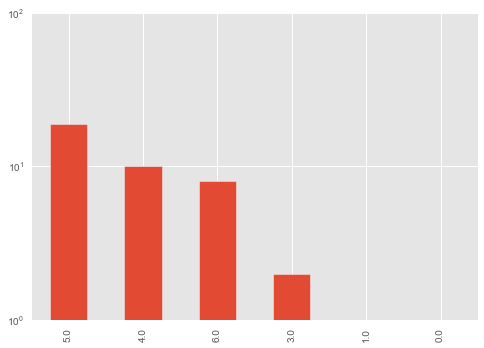

In [91]:
zsc_binned_array.loc[sma3genes].fillna('0').max(axis=1).value_counts().plot.bar(logy=True)
# ..stack() #.value_counts() #.plot.bar(logy=True)

In [63]:
zsc_binned_array.loc[sma3genes].stack().value_counts()

-1    1527
0      575
1      298
2      131
3       71
4       54
5       46
6        9
dtype: int64

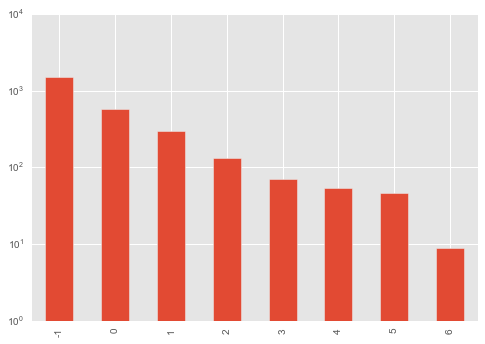

In [64]:
zsc_binned_array.loc[sma3genes].stack().value_counts().plot.bar(logy=True)

### Save zscore and bins to file
Store the z-score values

In [ ]:
#tau.to_csv('tau.tsv', sep='\t')
zscore.to_csv('expatlas.baseline.z-score.tsv', sep='\t')
zsc_binned_array.to_csv('expatlas.baseline.z-score.binned.tsv', sep='\t',na_rep='-1')

***

# Which measure would be better for a facet and for the expression view?

It's useful to compare how the scores would look in an expression summary view. 

Note that I am restoring first the binned values from the files (to make sure NaN are treated the same and to simulate what would happen when the file is read by the data_pipeline code.

In [ ]:
MB = 'ENSG00000198125'
OPALIN = 'ENSG00000197430'
IL5 = 'ENSG00000113525'
baseline = pd.read_table('expatlas.baseline.binned.tsv',index_col=0)
zed = pd.read_table('expatlas.baseline.z-score.binned.tsv',index_col=0)

In [ ]:
#OPALIN
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,15))

baseline[baseline>0].loc[OPALIN].plot(kind='barh',xlim=(0,10),ax=axes[0])
axes[0].set_title('OPALIN - global expression')

zed[zed>0].loc[OPALIN].plot(kind='barh',xlim=(0,6),ax=axes[1])
axes[1].set_title('OPALIN - zscore')
axes[1].yaxis.set_major_formatter(plt.NullFormatter())

In [ ]:
#MB gene
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,15))

baseline[baseline>0].loc[MB].plot(kind='barh',xlim=(0,10),ax=axes[0])
axes[0].set_title('MB - global expression')

zed[zed>0].loc[MB].plot(kind='barh',xlim=(0,6),ax=axes[1])
axes[1].set_title('MB - zscore')
axes[1].yaxis.set_major_formatter(plt.NullFormatter())


In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,15))

baseline[baseline>0].loc[IL5].plot(kind='barh',xlim=(0,10),ax=axes[0])
axes[0].set_title('IL5 - global expression')

zed[zed>0].loc[IL5].plot(kind='barh',xlim=(0,6),ax=axes[1])
axes[1].set_title('IL5 - zscore')
axes[1].yaxis.set_major_formatter(plt.NullFormatter())